In [1]:
import tensorflow as tf


In [2]:
from __future__ import print_function

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [16]:
mnist=input_data.read_data_sets("/tmp/data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [4]:
import matplotlib.pyplot as plt

In [6]:
learning_rate=0.001
training_epoch=15
batch_size=100
display_step=1

In [5]:
n_hidden1=256
n_hidden2=256
n_input=784
n_classes=10

In [11]:
learning_rate=.001
training_epoch=15
batch_size=100
display_step=1

In [6]:
x=tf.placeholder("float",[None,n_input])
y=tf.placeholder("float",[None,n_classes])



In [7]:
def multilayer_perceptron(x,weights,biases):
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1=tf.nn.relu(layer_1)
    
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2=tf.nn.relu(layer_2)
    
    out_layer=tf.matmul(layer_2,weights['out'])+biases['out']
    return out_layer
    

In [8]:
weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_hidden2,n_classes]))
    
}
biases={
    'b1':tf.Variable(tf.random_normal([n_hidden1])),
    'b2':tf.Variable(tf.random_normal([n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
    
}

In [9]:
pred=multilayer_perceptron(x,weights,biases)

In [12]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [13]:
init=tf.global_variables_initializer()

In [14]:
cost_history=[]
accuracy_history=[]

Instructions for updating:
Use `argmax` instead
Epoch: 0001 -cost= 159.300256185 Accuracy= 0.867
Epoch: 0002 -cost= 38.613888177 Accuracy= 0.9035
Epoch: 0003 -cost= 24.083421524 Accuracy= 0.9153
Epoch: 0004 -cost= 16.984502494 Accuracy= 0.9229
Epoch: 0005 -cost= 12.339428138 Accuracy= 0.9284
Epoch: 0006 -cost= 9.269793764 Accuracy= 0.932
Epoch: 0007 -cost= 6.891729148 Accuracy= 0.931
Epoch: 0008 -cost= 5.169505438 Accuracy= 0.9392
Epoch: 0009 -cost= 3.801139716 Accuracy= 0.9415
Epoch: 0010 -cost= 2.904102662 Accuracy= 0.941
Epoch: 0011 -cost= 2.078720869 Accuracy= 0.9441
Epoch: 0012 -cost= 1.652811161 Accuracy= 0.9439
Epoch: 0013 -cost= 1.221491272 Accuracy= 0.9423
Epoch: 0014 -cost= 1.100471146 Accuracy= 0.9452
Epoch: 0015 -cost= 0.816591161 Accuracy= 0.9468
optimization finished


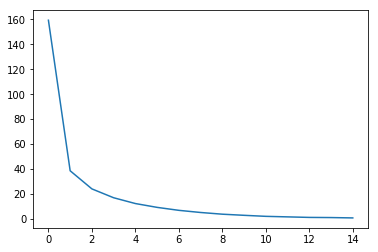

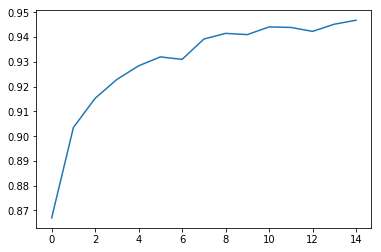

Accuracy: 0.9468


In [17]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epoch):
        avg_cost=0
        total_batch=int(mnist.train.num_examples/batch_size)
        #loop over all batches
        for i in range(total_batch):
            batch_x,batch_y=mnist.train.next_batch(batch_size)
            #run optimization op(backprop) and cost op(to get loss value)
            _,c=sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
            #compute average loss
            avg_cost+=c/total_batch
        #display logs per each step
        if epoch%display_step==0:
            
            correct_prediction=tf.equal(tf.arg_max(pred,1),tf.arg_max(y,1))
            #calculate accuracy
            accuracy=tf.reduce_mean(tf.cast(correct_prediction,"float"))
            acu_temp=accuracy.eval({x:mnist.test.images,y:mnist.test.labels})
            #append the accuracy to the list
            accuracy_history.append(acu_temp)
            #append the cost history
            cost_history.append(avg_cost)
            print("Epoch:",'%04d' % (epoch+1),"-cost=","{:.9f}".format(avg_cost),"Accuracy=",acu_temp)
    print("optimization finished")
    #plot the cost history
    plt.plot(cost_history)
    plt.show()
    plt.plot(accuracy_history)
    plt.show()
    correct_prediction=tf.equal(tf.arg_max(pred,1),tf.arg_max(y,1))
    #calculate accuracy
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,"float"))
    print("Accuracy:",accuracy.eval({x:mnist.test.images,y:mnist.test.labels}))
    
            
    